In [91]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import src.evaluation
import src.config

In [4]:
results = pd.read_parquet('./results/df_data.parquet.gzip')

In [5]:
display(results.head())
print(results.shape)
print(results.columns.tolist())

,Uniprot_AC,Kingdom,Type,Partition_No,Sequence,Label,Sequence_Raw,input_ids,ds_attention_mask,ds_labels,ds_type,predicted_type,predicted_label_linear_ALL,predicted_label_linear_experts,predicted_label_crf_ALL,predicted_label_crf_experts
0,P55317,EUKARYA,NO_SP,4,M L G T V K M E G H E T S D W N S Y Y A D T Q ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MLGTVKMEGHETSDWNSYYADTQEAYSSVPVSNMNSGLGSMNSMNT...,"[19, 4, 5, 11, 6, 14, 19, 9, 5, 20, 9, 11, 7, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMI...
1,P35583,EUKARYA,NO_SP,4,M L G A V K M E G H E P S D W S S Y Y A E P E ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MLGAVKMEGHEPSDWSSYYAEPEGYSSVSNMNAGLGMNGMNTYMSM...,"[19, 4, 5, 3, 6, 14, 19, 9, 5, 20, 9, 13, 7, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MIMIMIMIMIMIMIMIMIMIMOIMIMIMIMIMIMIMIMIMIMIMIM...
2,Q8UVD9,EUKARYA,NO_SP,4,M E I S T P D F G F G T E D S S A Q Q S A N R ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MEISTPDFGFGTEDSSAQQSANRAIPQPVPAPAFPLKETASDTGGT...,"[19, 9, 12, 7, 11, 13, 10, 15, 5, 15, 5, 11, 9...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMI...
3,Q99PF5,EUKARYA,NO_SP,4,M S D Y S T G G P P P G P P P P A G G G G G A ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MSDYSTGGPPPGPPPPAGGGGGAAGAGGGPPPGPPGAGDRGGGGPG...,"[19, 7, 10, 18, 7, 11, 5, 5, 13, 13, 13, 5, 13...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMOIMIMIM...
4,Q9URU9,EUKARYA,NO_SP,4,M N F R P E Q Q Y I L E K P G I L L S F E Q L ...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MNFRPEQQYILEKPGILLSFEQLRINFKHILRHLEHESHVINSTLT...,"[19, 17, 15, 8, 13, 9, 16, 16, 18, 12, 4, 9, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII...,MIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMIMI...


(4147, 16)
['Uniprot_AC', 'Kingdom', 'Type', 'Partition_No', 'Sequence', 'Label', 'Sequence_Raw', 'input_ids', 'ds_attention_mask', 'ds_labels', 'ds_type', 'predicted_type', 'predicted_label_linear_ALL', 'predicted_label_linear_experts', 'predicted_label_crf_ALL', 'predicted_label_crf_experts']


In [38]:
sum([len(x) for x in results['Label'].tolist()]), sum([len(x) for x in results['predicted_label_linear_ALL'].tolist()])

(289886, 289886)

/Users/finnlueth/Developer/gits/prottrans-t5-signalpeptide-prediction/src/evaluation.py:47: RuntimeWarning: invalid value encountered in sqrt
  


{'CM': array([[ 15425,      0,      0,    252,      0,      0],
       [     0,   3029,      0,    105,      0,      0],
       [     0,      0,   6199,     57,      2,      1],
       [   100,     63,     66,  48422,   5515,    147],
       [     4,      0,      0,    190, 202423,    257],
       [    21,      0,      9,    639,   3904,   3056]]), 'FP': array([ 125,   63,   75, 1243, 9421,  405]), 'FN': array([ 252,  105,   60, 5891,  451, 4573]), 'TP': array([ 15425,   3029,   6199,  48422, 202423,   3056]), 'TN': array([274084, 286689, 283552, 234330,  77591, 281852]), 'TPR': array([0.9839255 , 0.96649649, 0.9904138 , 0.8915361 , 0.99777695,
       0.40057675]), 'TNR': array([0.99954414, 0.9997803 , 0.99973557, 0.9947235 , 0.89172758,
       0.99856514]), 'PPV': array([0.99196141, 0.97962484, 0.9880459 , 0.97497231, 0.9555286 ,
       0.8829818 ]), 'NPV': array([0.99908142, 0.99963388, 0.99978844, 0.97547675, 0.99422106,
       0.98403421]), 'FPR': array([0.00045586, 0.0002197 , 0.0

/Users/finnlueth/Developer/gits/prottrans-t5-signalpeptide-prediction/src/evaluation.py:47: RuntimeWarning: invalid value encountered in sqrt
  


<Axes: title={'center': 'Confusion Matrix for predicted_label_linear_experts'}, xlabel='Actual', ylabel='Predicted'>

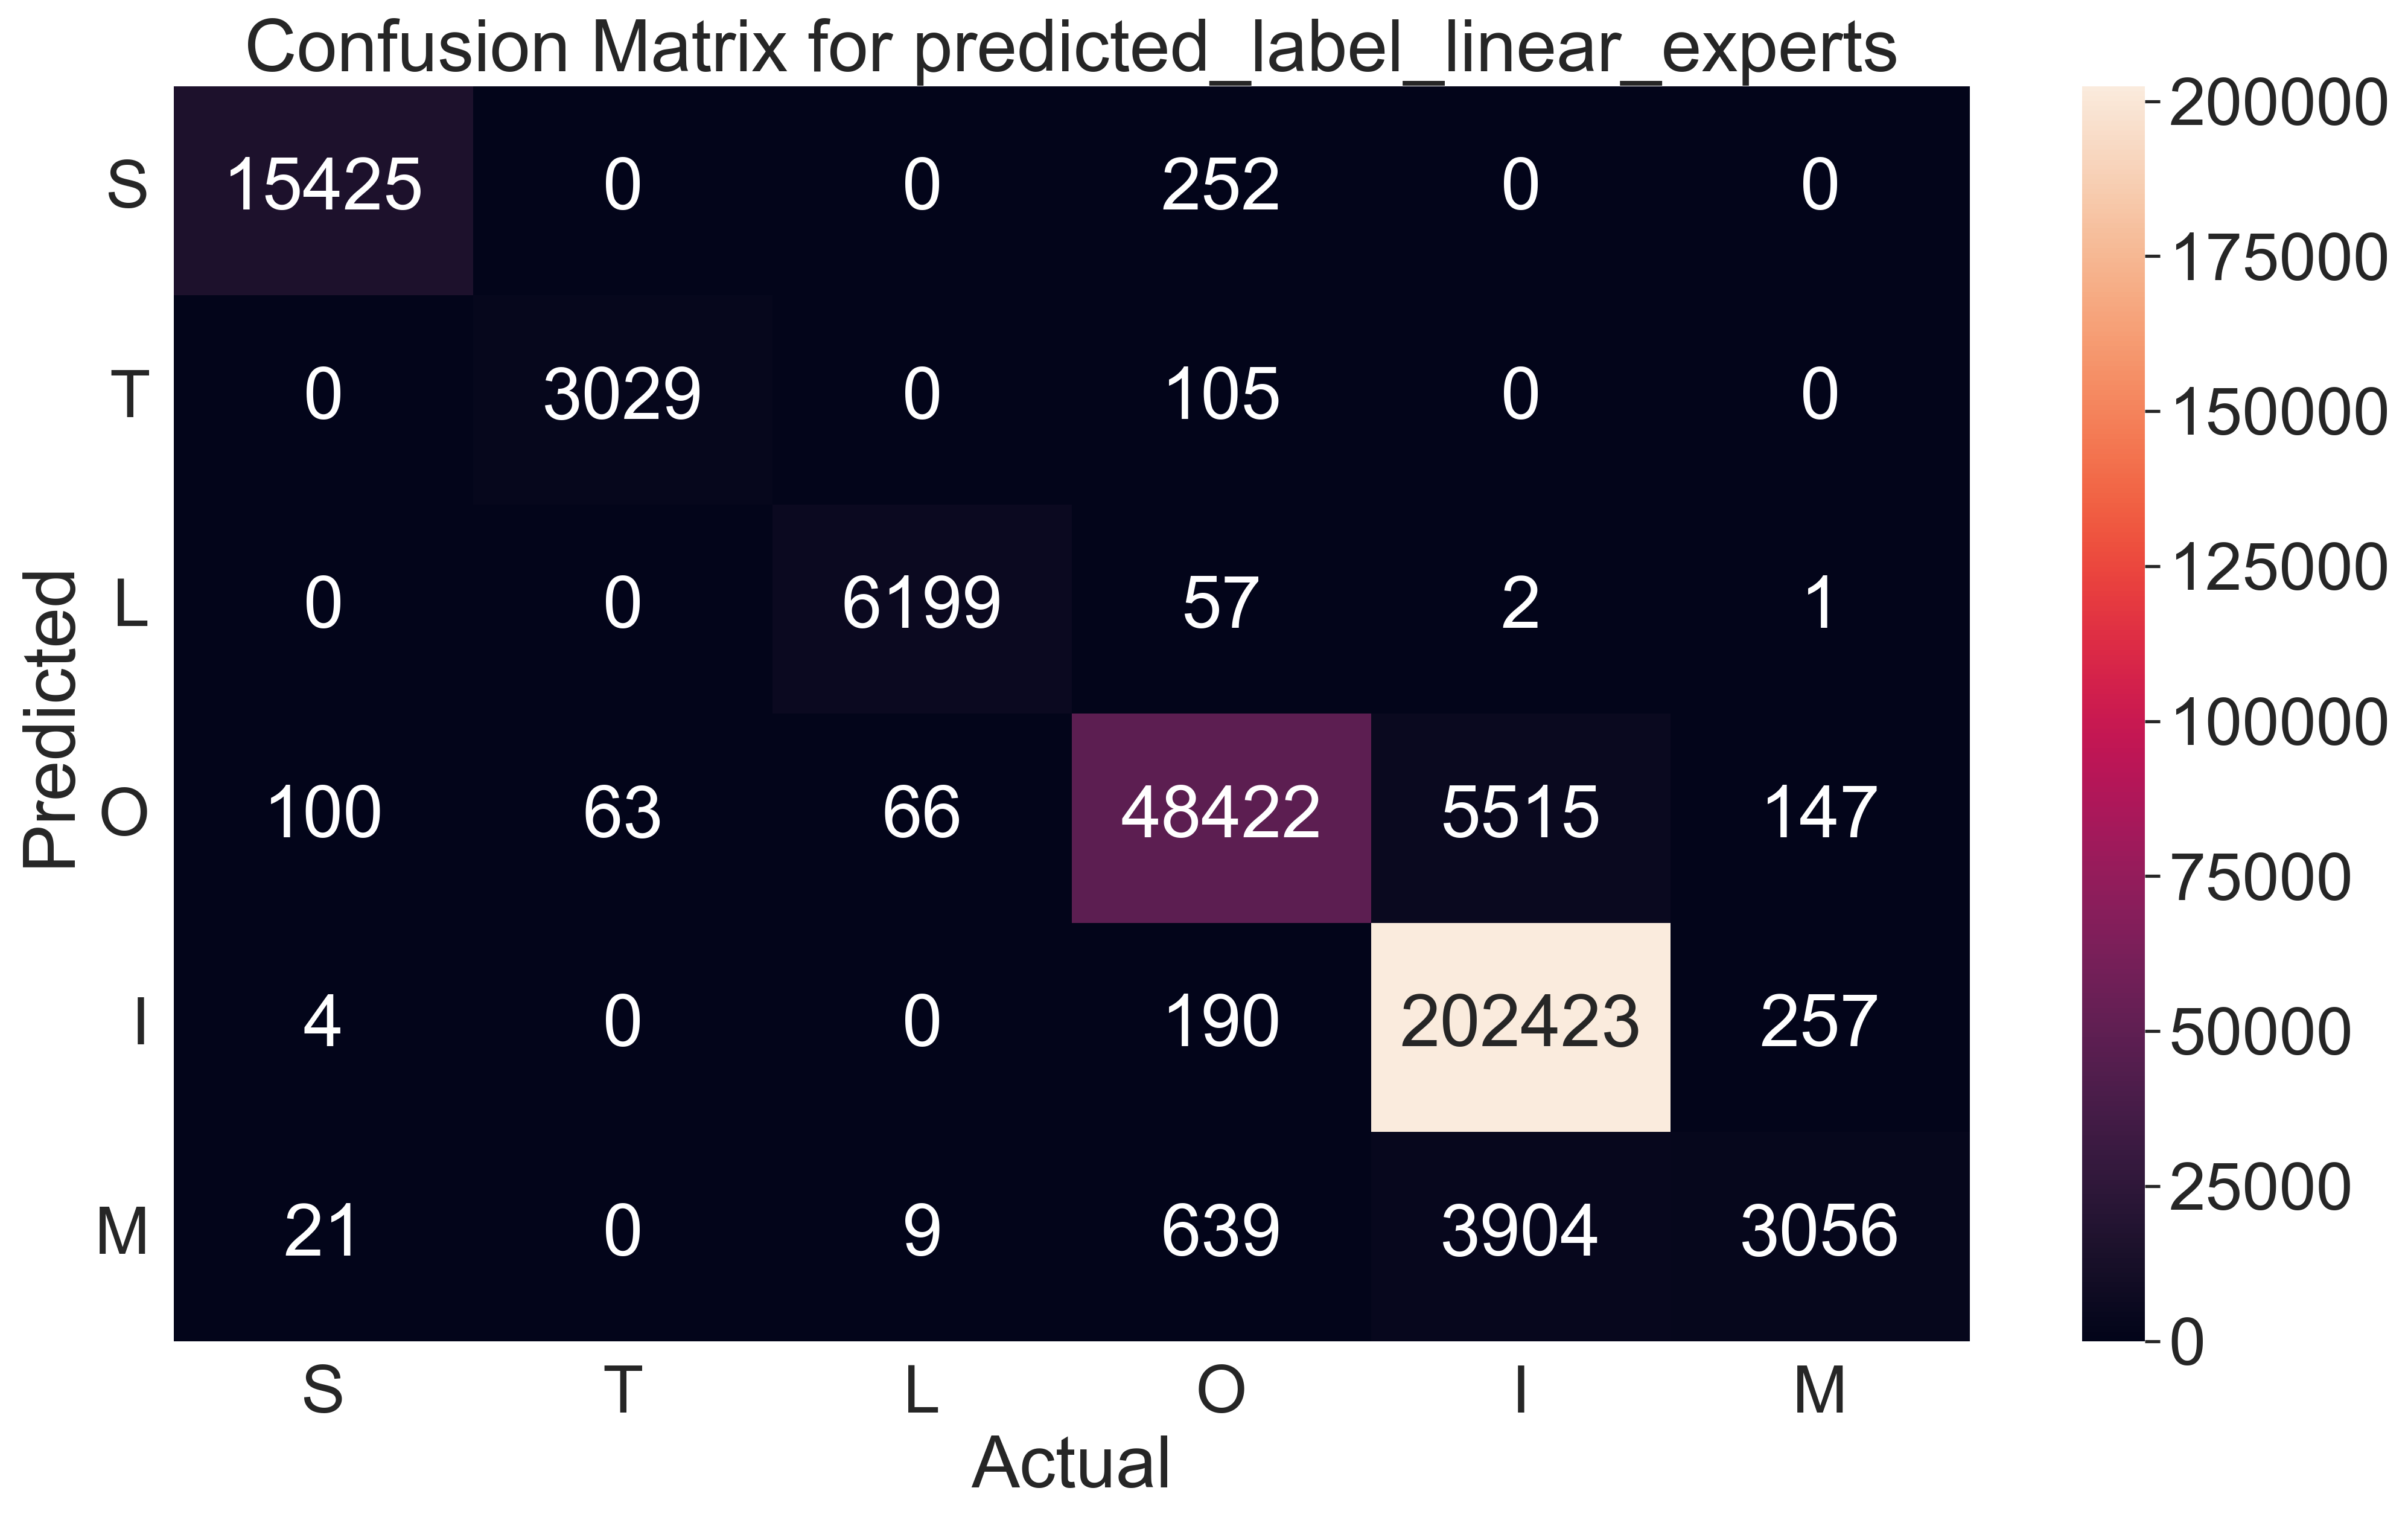

In [96]:
# current = 'predicted_label_linear_ALL'
current = 'predicted_label_linear_experts'
# current = 'predicted_label_crf_ALL'
# current = 'predicted_label_crf_experts'

target = list(''.join(results['Label'].tolist()))
prediction = list(''.join(results[current].tolist()))

# target = list(results['Label'].at[1])
# prediction = list(results[current].at[1])

# print(len(targets), len(predictions))
# print(target)
# print(prediction)

# expert_labels = list(src.config.label_encoding.keys())
expert_labels = list(['S', 'L', 'T' 'O', 'I', 'M'])
# print(expert_labels)

evaluation_1 = src.evaluation.evaluate(
    targets = target,
    predictions = prediction,
    labels = expert_labels,
)

evaluation_2 = src.evaluation.evaluate(
    targets = target,
    predictions = prediction,
    labels = expert_labels,
)

print(evaluation_1)
# print(*evaluation_1.items(), sep='\n')
display(src.evaluation.plot_confusion_matrix(evaluation_1['CM'], expert_labels, title=f"Confusion Matrix for {current}"))

---

In [100]:
gate_labels = ['NO_SP', 'SP', 'LIPO', 'TAT']

metrics_gate = src.evaluation.evaluate(
    targets=results['Type'],
    predictions=results['predicted_type'],
    labels=gate_labels
)
print(metrics_gate)
print(metrics_gate['TPR'].mean())
# display(src.evaluation.plot_confusion_matrix(metrics_gate['CM'], gate_labels))

{'CM': array([[3064,   17,    1,    0],
       [  12,  652,   12,    0],
       [   5,   11,  282,    0],
       [   0,    5,    0,   86]]), 'FP': array([17, 33, 13,  0]), 'FN': array([18, 24, 16,  5]), 'TP': array([3064,  652,  282,   86]), 'TN': array([1048, 3438, 3836, 4056]), 'TPR': array([0.99415964, 0.96449704, 0.94630872, 0.94505495]), 'TNR': array([0.98403756, 0.99049265, 0.9966225 , 1.        ]), 'PPV': array([0.99448231, 0.95182482, 0.9559322 , 1.        ]), 'NPV': array([0.98311445, 0.99306759, 0.99584631, 0.99876878]), 'FPR': array([0.01596244, 0.00950735, 0.0033775 , 0.        ]), 'FNR': array([0.00584036, 0.03550296, 0.05369128, 0.05494505]), 'FDR': array([0.00551769, 0.04817518, 0.0440678 , 0.        ]), 'ACC': array([0.99156016, 0.98625512, 0.99300699, 0.99879431]), 'F1': array([0.99432095, 0.95811903, 0.95109612, 0.97175141]), 'MCC_1': 0.9634329174725134, 'MCC_2': array([0.97789693, 0.94992764, 0.94734454, 0.97154072]), 'MCC_3': array([0.97789693, 0.94992764, 0.9473445

['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
[ 1. nan nan nan]
['LIPO', 'NO_SP', 'SP', 'NO_SP', 'NO_SP']
['LIPO', 'NO_SP', 'SP', 'NO_SP', 'NO_SP']
[ 1.  1.  1. nan]
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
[ 1. nan nan nan]
['NO_SP', 'NO_SP', 'NO_SP', 'LIPO', 'NO_SP']
['NO_SP', 'NO_SP', 'NO_SP', 'LIPO', 'NO_SP']
[ 1. nan  1. nan]
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
[ 1. nan nan nan]
['NO_SP', 'SP', 'NO_SP', 'NO_SP', 'TAT']
['NO_SP', 'SP', 'NO_SP', 'NO_SP', 'TAT']
[ 1.  1. nan  1.]
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
[ 1. nan nan nan]
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'SP']
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'SP']
[ 1.  1. nan nan]
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP', 'NO_SP']
[ 1. nan nan nan]
['NO_SP', 'NO_SP', 'NO_SP', 'NO_SP',

/Users/finnlueth/Developer/gits/prottrans-t5-signalpeptide-prediction/src/evaluation.py:34: RuntimeWarning: invalid value encountered in divide
  TN = CM.sum() - (FP + FN + TP)
/Users/finnlueth/Developer/gits/prottrans-t5-signalpeptide-prediction/src/evaluation.py:35: RuntimeWarning: invalid value encountered in divide
  
/Users/finnlueth/Developer/gits/prottrans-t5-signalpeptide-prediction/src/evaluation.py:36: RuntimeWarning: invalid value encountered in divide
  TPR = TP/(TP+FN)
/Users/finnlueth/Developer/gits/prottrans-t5-signalpeptide-prediction/src/evaluation.py:37: RuntimeWarning: invalid value encountered in divide
  TNR = TN/(TN+FP)
/Users/finnlueth/Developer/gits/prottrans-t5-signalpeptide-prediction/src/evaluation.py:38: RuntimeWarning: invalid value encountered in divide
  PPV = TP/(TP+FP)
/Users/finnlueth/Developer/gits/prottrans-t5-signalpeptide-prediction/src/evaluation.py:39: RuntimeWarning: invalid value encountered in divide
  NPV = TN/(TN+FN)
/Users/finnlueth/Develop

0.0

<Axes: title={'center': 'Confusion Matrix for Gate'}, xlabel='Actual', ylabel='Predicted'>

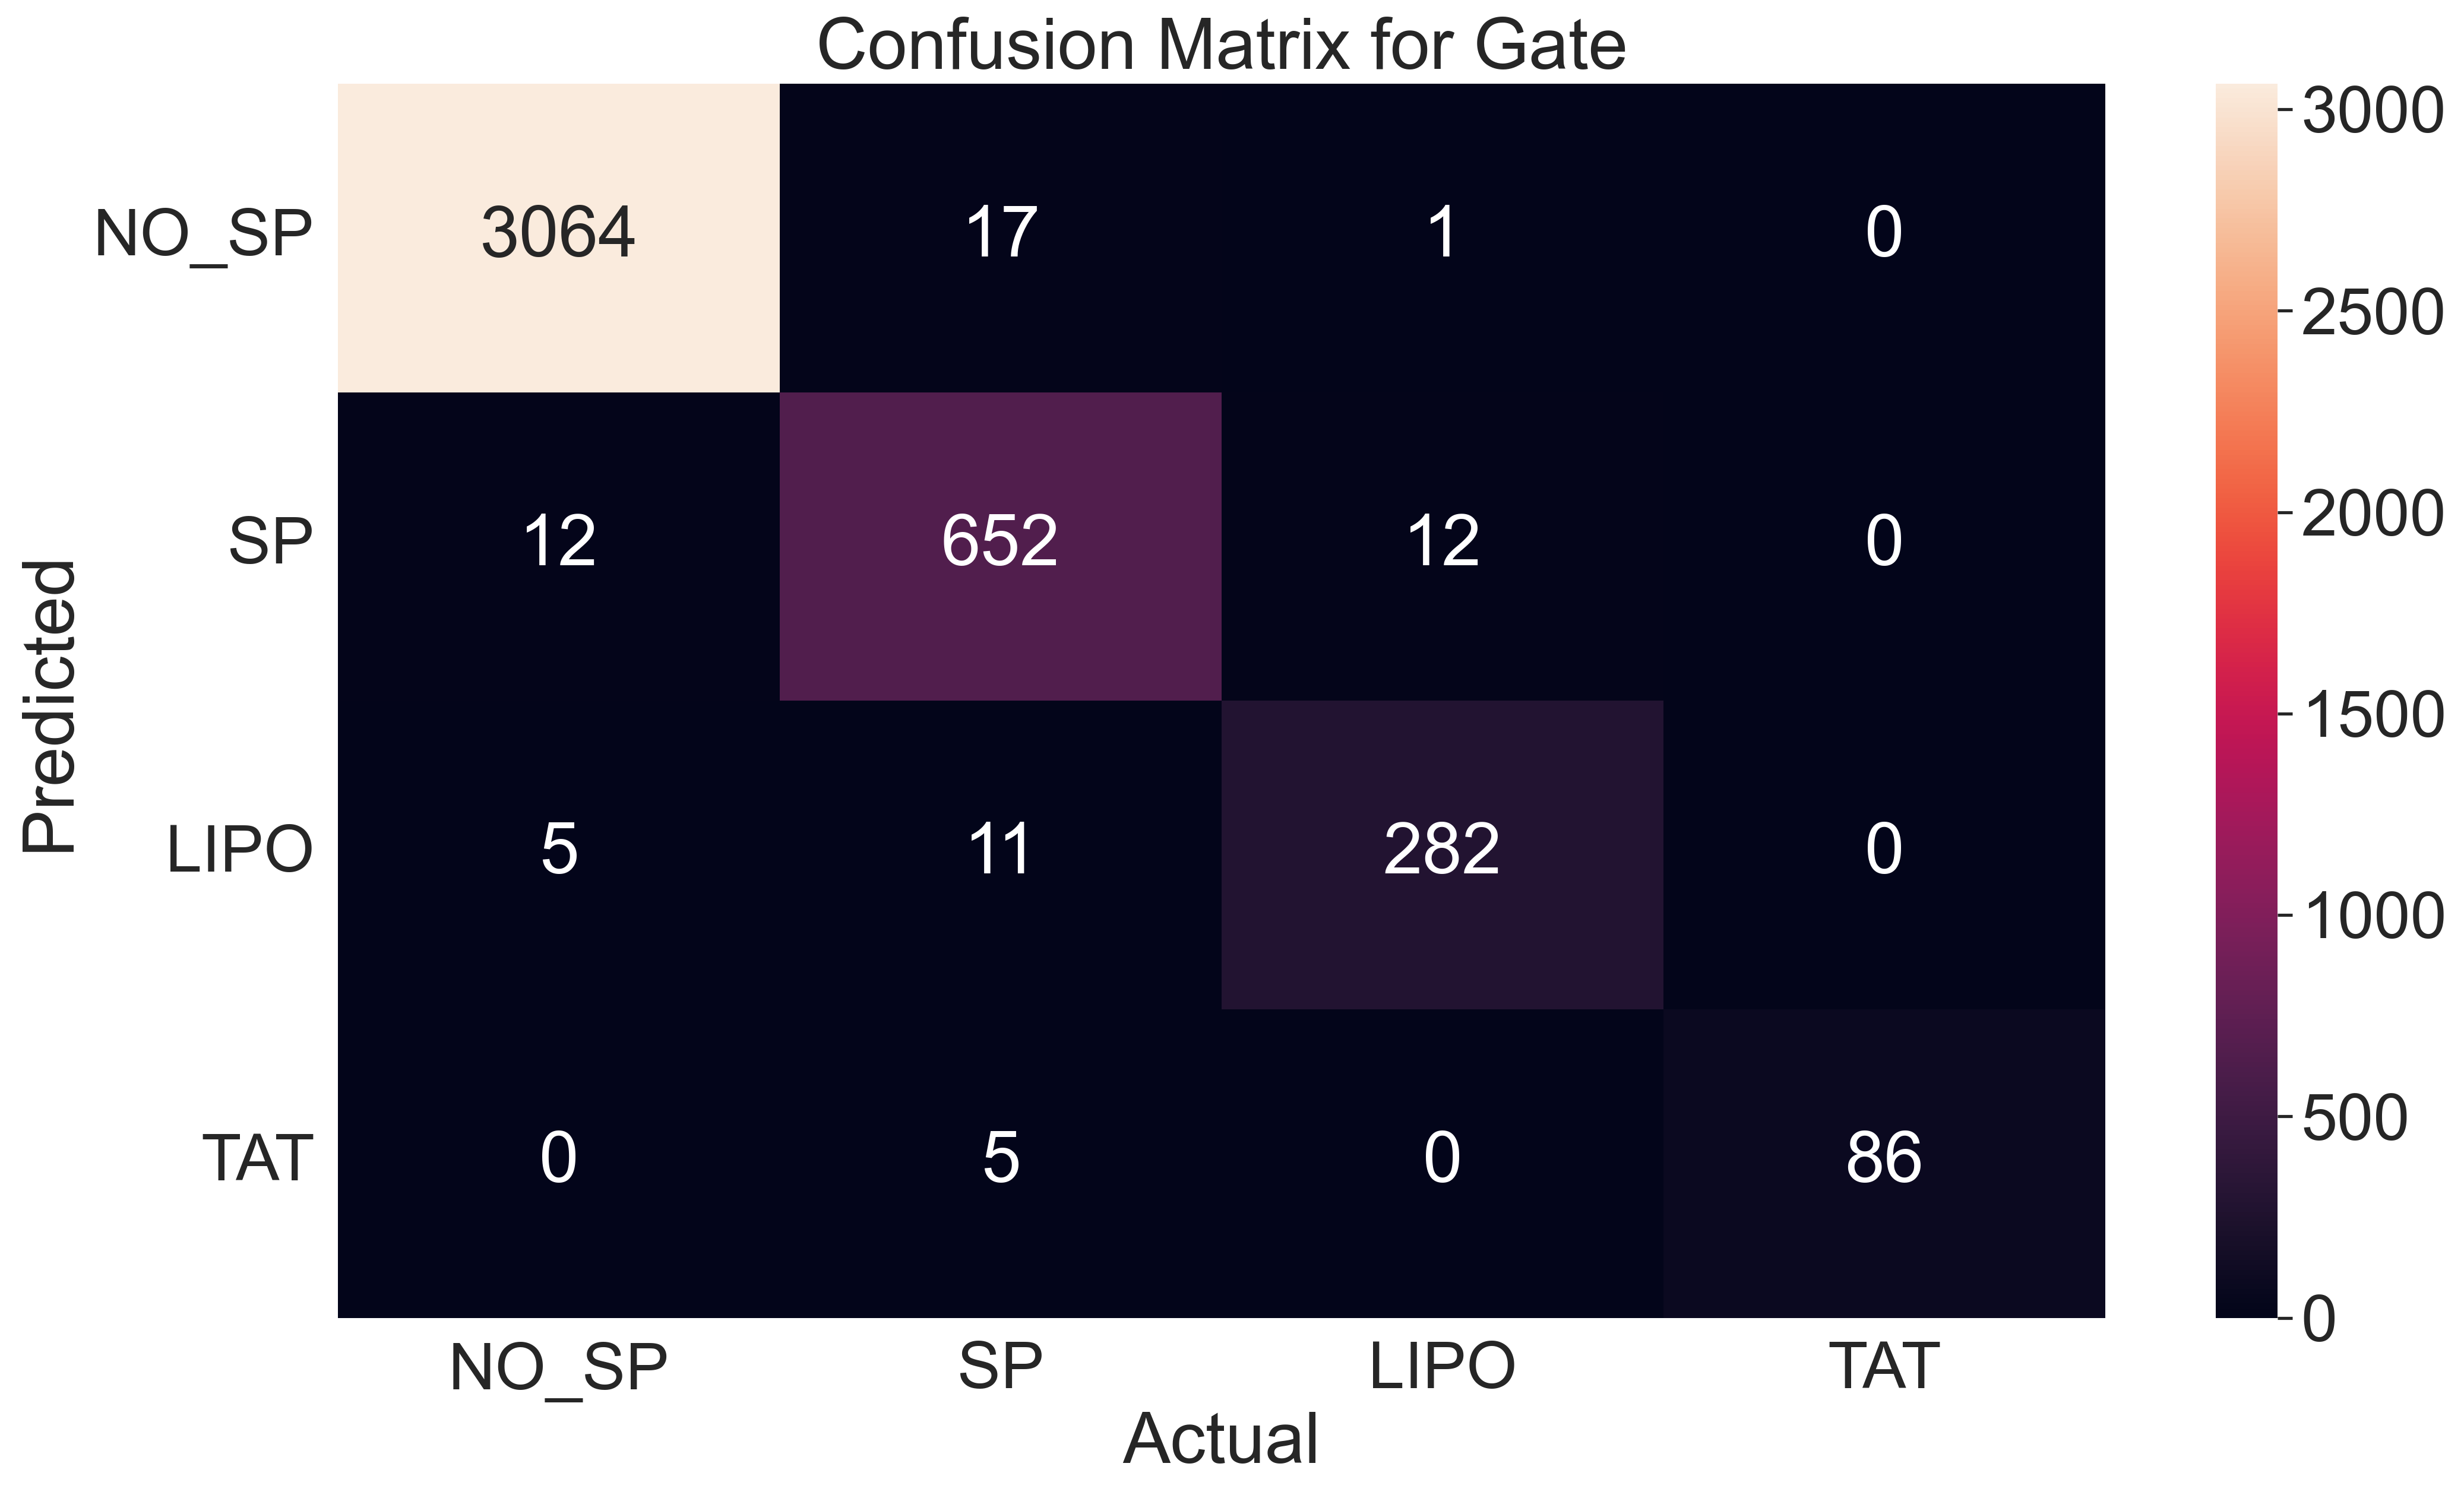

In [138]:
sample_metric = "TPR"
B = 10
samples = np.empty(B)

for x in range(B):
    sample = results.sample(5)[['Type', 'predicted_type']]
    targets = sample['Type']
    predictions = sample['predicted_type']
    
    sample_metrics_gate = src.evaluation.evaluate(
        targets=targets,
        predictions=predictions,
        labels=gate_labels
    )
    
    print(targets.tolist())
    print(predictions.tolist())
    print(sample_metrics_gate[sample_metric])
    
    samples[x] = np.nanmean(sample_metrics_gate[sample_metric])
display(np.sqrt(1/(B-1)*np.sum(samples-samples.mean()**2)))
src.evaluation.plot_confusion_matrix(metrics_gate['CM'], gate_labels, title="Confusion Matrix for Gate")

---

In [127]:
# sample = results.sample(5)[['Type', 'predicted_type']]
sample = results[['Type', 'predicted_type']]
targets = sample['Type']
predictions = sample['predicted_type']

In [129]:
# display(targets)
# display(predictions)

In [134]:
sample_metrics_gate = src.evaluation.evaluate(
        targets=targets,
        predictions=predictions,
        labels=gate_labels
    )
display(gate_labels)
display(sample_metrics_gate)

['NO_SP', 'SP', 'LIPO', 'TAT']

{'CM': array([[3064,   17,    1,    0],
        [  12,  652,   12,    0],
        [   5,   11,  282,    0],
        [   0,    5,    0,   86]]),
 'ACC': array([0.99156016, 0.98625512, 0.99300699, 0.99879431]),
 'TP': array([3064,  652,  282,   86]),
 'TN': array([1048, 3438, 3836, 4056]),
 'FP': array([17, 33, 13,  0]),
 'FN': array([18, 24, 16,  5]),
 'TPR': array([0.99415964, 0.96449704, 0.94630872, 0.94505495]),
 'TNR': array([0.98403756, 0.99049265, 0.9966225 , 1.        ]),
 'PPV': array([0.99448231, 0.95182482, 0.9559322 , 1.        ]),
 'FPR': array([0.01596244, 0.00950735, 0.0033775 , 0.        ]),
 'FNR': array([0.00584036, 0.03550296, 0.05369128, 0.05494505]),
 'NPV': array([0.98311445, 0.99306759, 0.99584631, 0.99876878]),
 'FDR': array([0.00551769, 0.04817518, 0.0440678 , 0.        ]),
 'F1': array([0.99432095, 0.95811903, 0.95109612, 0.97175141]),
 'MCC_1': 0.9634329174725134,
 'MCC_2': array([0.97789693, 0.94992764, 0.94734454, 0.97154072]),
 'MCC_3': array([0.97789693, 0.

<Axes: title={'center': 'Confusion Matrix for Gate'}, xlabel='Actual', ylabel='Predicted'>

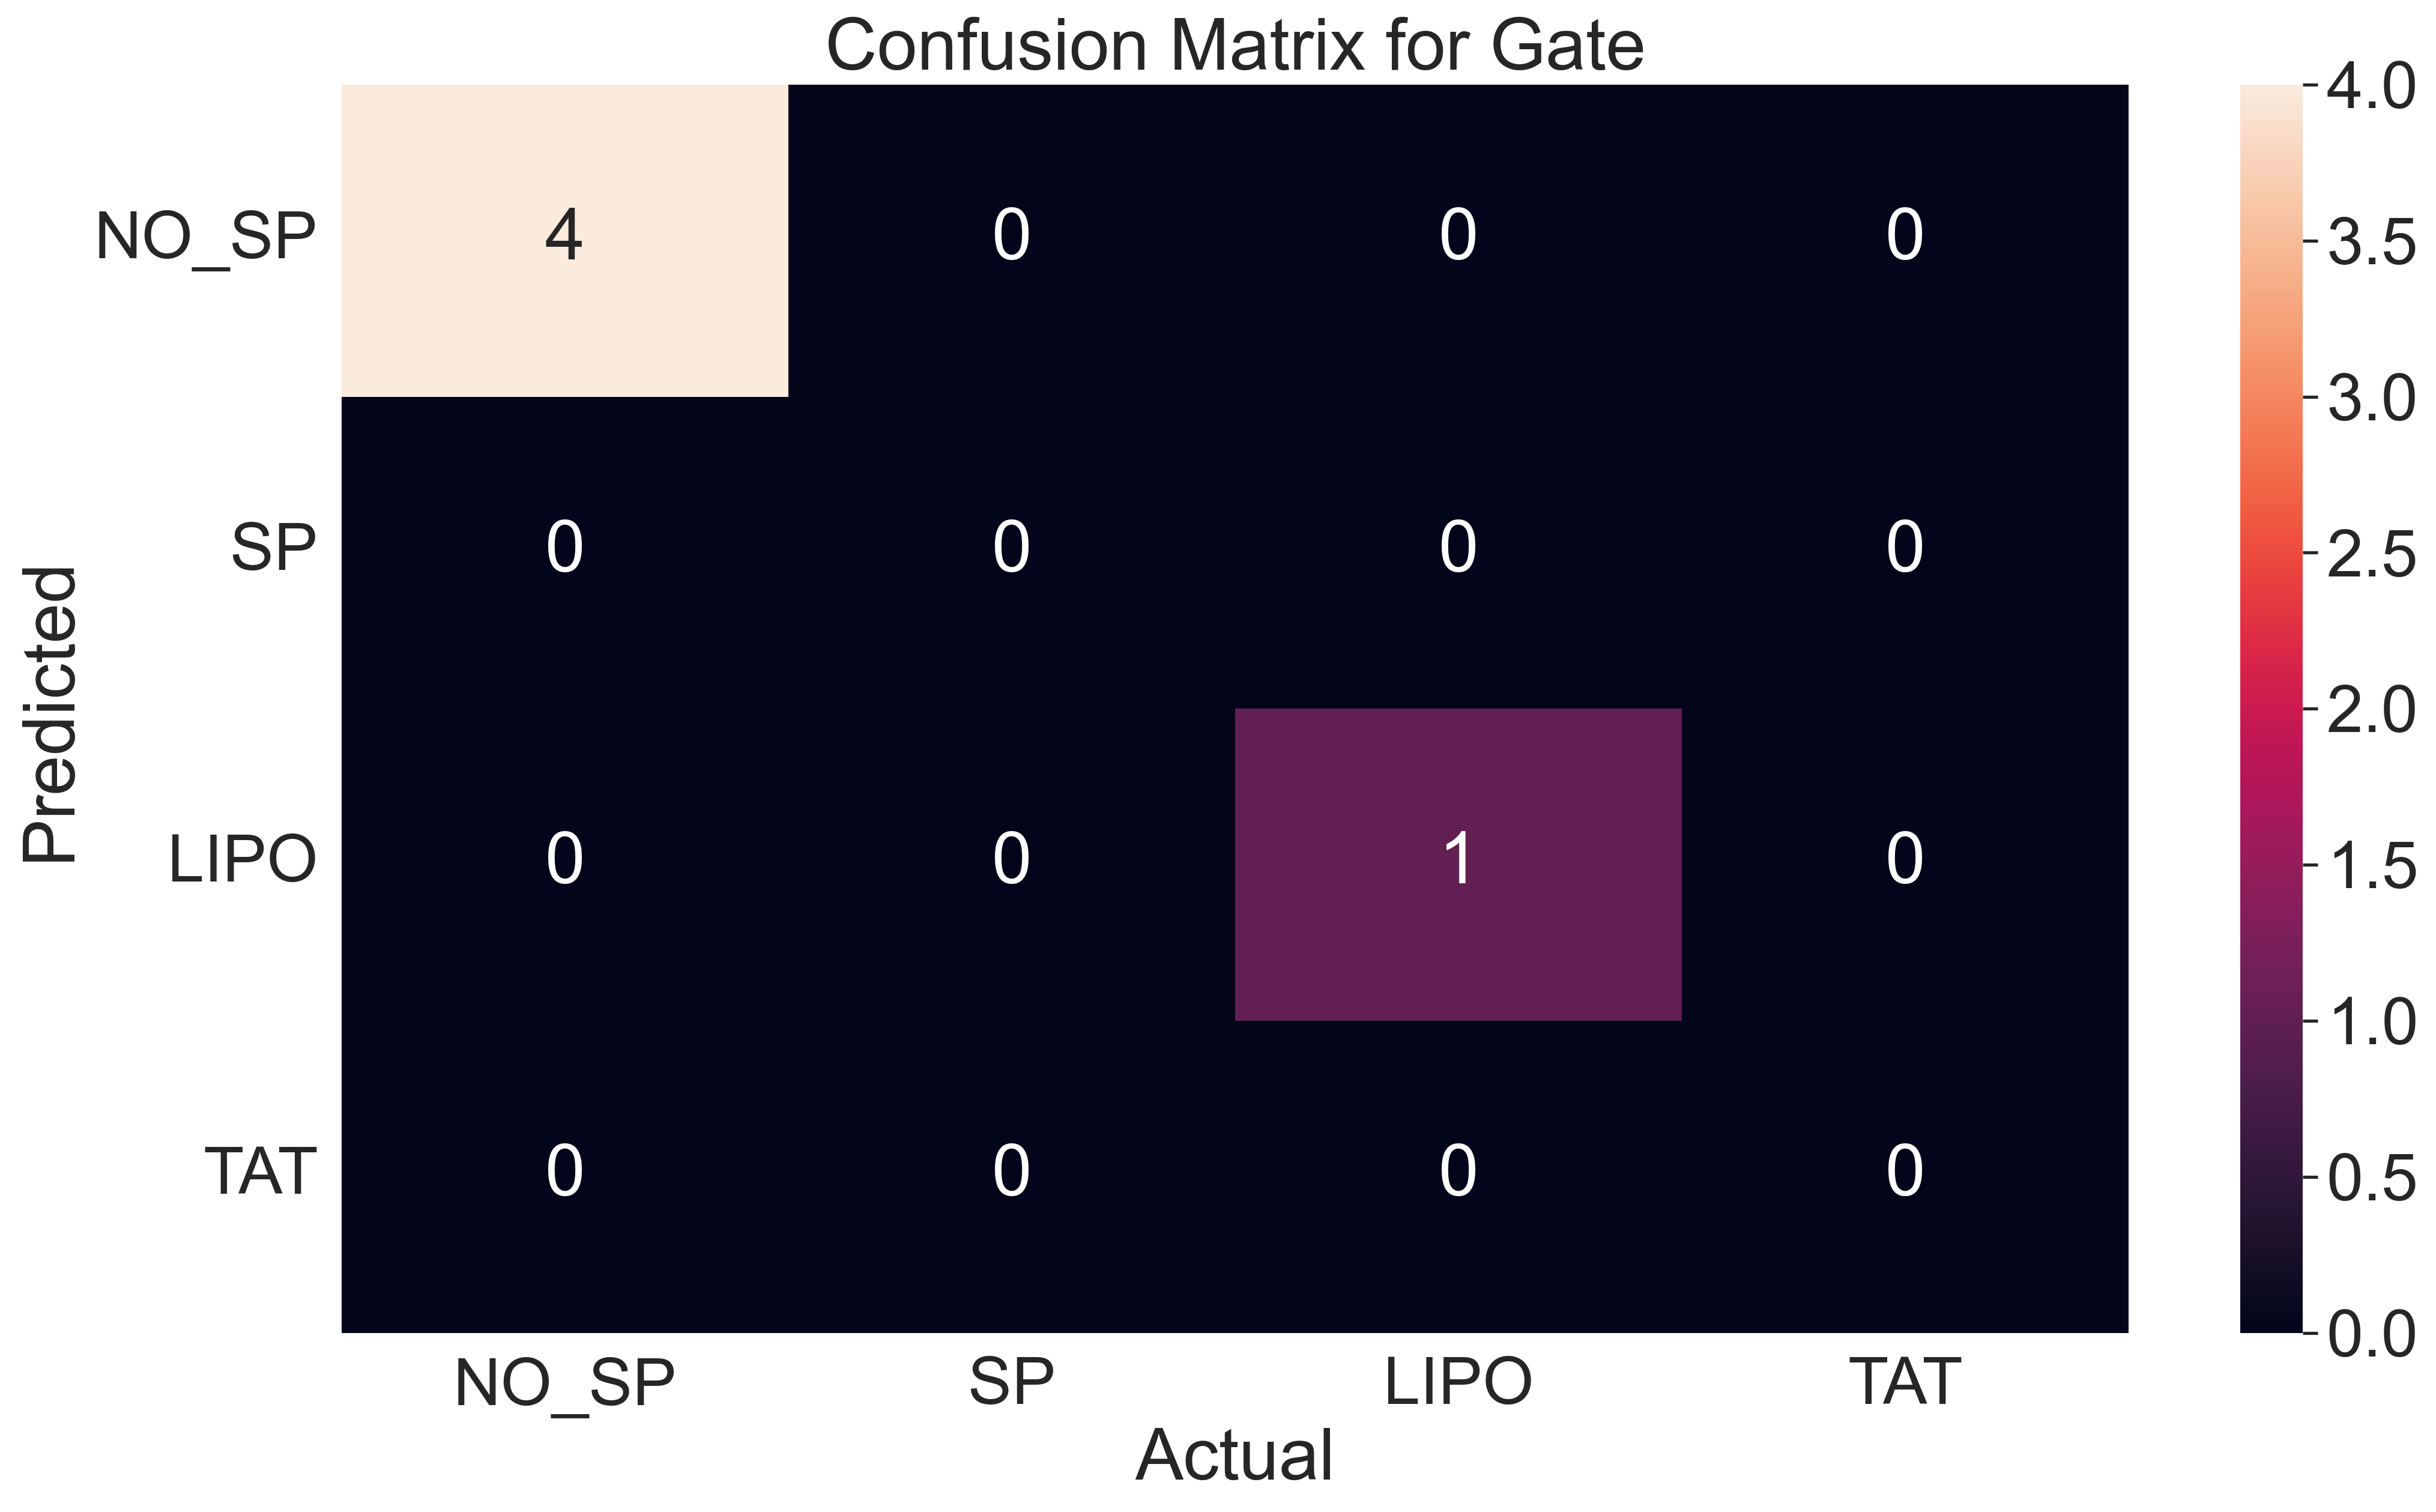

In [137]:
src.evaluation.plot_confusion_matrix(sample_metrics_gate['CM'], gate_labels, title="Confusion Matrix for Gate")

{'CM': array([[3, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]),
 'FP': array([1, 0, 0, 0]),
 'FN': array([0, 1, 0, 0]),
 'TP': array([3, 1, 0, 0]),
 'TN': array([1, 3, 5, 5]),
 'TPR': array([1. , 0.5, nan, nan]),
 'TNR': array([0.5, 1. , 1. , 1. ]),
 'PPV': array([0.75, 1.  ,  nan,  nan]),
 'NPV': array([1.  , 0.75, 1.  , 1.  ]),
 'FPR': array([0.5, 0. , 0. , 0. ]),
 'FNR': array([0. , 0.5, nan, nan]),
 'FDR': array([0.25, 0.  ,  nan,  nan]),
 'ACC': array([0.8, 0.8, 1. , 1. ]),
 'F1': array([0.85714286, 0.66666667,        nan,        nan]),
 'MCC_1': 0.6123724356957946,
 'MCC_2': array([0.61237244, 0.61237244,        nan,        nan]),
 'MCC_3': array([0.61237244, 0.61237244,        nan,        nan]),
 'ERROR': 0,
 'TOTAL_TARGETS': 5,
 'TOTAL_PREDICTIONS': 5}